# Wavelength recalibration with the sky lines (Mendel OH bands)

## Introduction

Data can be recalibrated in wavelength easily when one OH sky lines are visible in most parts of the field of view. Cubes observed in the red part of the spectrum (e.g. SN3 filter) are especially interesting in this respect. 

The general idea is to extract integrated spectra at different positions in the field of view and measure the velocity of the sky lines (which should be 0 if the calibration was perfect) (see [Martin et al. 2017a](https://arxiv.org/abs/1707.01366)). 

![skymap-fig0.svg](./skymap-fig0.svg)

Then the correction map can be infered at each pixel by fitting a model.

![skymap-fig1.svg](./skymap-fig1.svg)

The calibration model is based on a simple modeling of the interferometer.

![coords0.svg](./coords0.svg)

## First step: checking the calibration

In [1]:
# inline plotting for jupyter notebook. Do not put this line in a real python script.
%matplotlib inline

In [2]:
# import base class for the manipulation of a SITELLE spectral cube: HDFCube
from orcs.process import SpectralCube
import pylab as pl

In [3]:
# load spectral cube
cube = SpectralCube('/home/thomas/M31_SN3.merged.cm1.1.0.hdf5')

INFO| Data shape : (2048, 2064, 840)
INFO| Cube is in WAVENUMBER (cm-1)
INFO| Cube is CALIBRATED in wavenumber


INFO| Number of integrated pixels: 1257


 [==========] [100%] [completed in 0.292 s]                                   


INFO| Init of the parallel processing server with 16 threads


 [==========] [100%] [completed in 0.584 s]                                   


(14500, 15500)

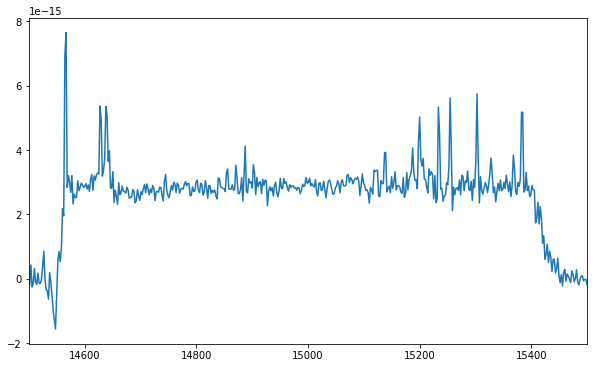

In [4]:
# extract and plot a spectrum of a large integrated region. The sky lines should appear.
axis, spectrum = cube.extract_spectrum(50, 50, 20)
pl.figure(figsize=(10,6))
pl.plot(axis, spectrum)
pl.xlim(14500, 15500)

### fitting the sky spectrum

we can also fit the integrated spectrum because there si a large number of sky lines and because we are not interested in a perfect fit (only the velocity is required), we can use a simple 'sinc' model with a fixed fwhm. All the lines are set to share the same velocity parameter and we set an inital guess of the velocity around 80 km/s. This general bias of 80 km/s is known ([Martin et al. 2017b](https://arxiv.org/abs/1706.03230)) and comes from the error made on the real wavelength of the calibration laser (which is falsely considered to be at 453.5 nm).

INFO| Number of integrated pixels: 1257


 [==========] [100%] [completed in 0.020 s]                                   


INFO| Init of the parallel processing server with 16 threads


 [==========] [100%] [completed in 0.559 s]                                   


WARNING| /home/thomas/Astro/Python/ORB/Orcs/orcs/core.py:1546: RuntimeWarning: invalid value encountered in sqrt
  noise_counts = np.sqrt(total_counts)




===== Results ======
Velocity:  [72.5(1.5) 72.5(1.5) 72.5(1.5) 72.5(1.5) 72.5(1.5) 72.5(1.5) 72.5(1.5)
 72.5(1.5) 72.5(1.5) 72.5(1.5) 72.5(1.5) 72.5(1.5) 72.5(1.5) 72.5(1.5)
 72.5(1.5) 72.5(1.5) 72.5(1.5) 72.5(1.5) 72.5(1.5) 72.5(1.5) 72.5(1.5)
 72.5(1.5) 72.5(1.5) 72.5(1.5) 72.5(1.5) 72.5(1.5) 72.5(1.5) 72.5(1.5)
 72.5(1.5) 72.5(1.5) 72.5(1.5) 72.5(1.5) 72.5(1.5) 72.5(1.5) 72.5(1.5)
 72.5(1.5) 72.5(1.5) 72.5(1.5) 72.5(1.5) 72.5(1.5) 72.5(1.5) 72.5(1.5)
 72.5(1.5) 72.5(1.5) 72.5(1.5) 72.5(1.5) 72.5(1.5) 72.5(1.5) 72.5(1.5)
 72.5(1.5) 72.5(1.5) 72.5(1.5) 72.5(1.5) 72.5(1.5) 72.5(1.5) 72.5(1.5)
 72.5(1.5) 72.5(1.5) 72.5(1.5) 72.5(1.5) 72.5(1.5) 72.5(1.5) 72.5(1.5)
 72.5(1.5) 72.5(1.5) 72.5(1.5) 72.5(1.5) 72.5(1.5) 72.5(1.5) 72.5(1.5)
 72.5(1.5) 72.5(1.5) 72.5(1.5) 72.5(1.5) 72.5(1.5) 72.5(1.5) 72.5(1.5)
 72.5(1.5) 72.5(1.5) 72.5(1.5) 72.5(1.5) 72.5(1.5) 72.5(1.5) 72.5(1.5)
 72.5(1.5) 72.5(1.5) 72.5(1.5) 72.5(1.5) 72.5(1.5) 72.5(1.5) 72.5(1.5)
 72.5(1.5) 72.5(1.5)]


(14500, 15500)

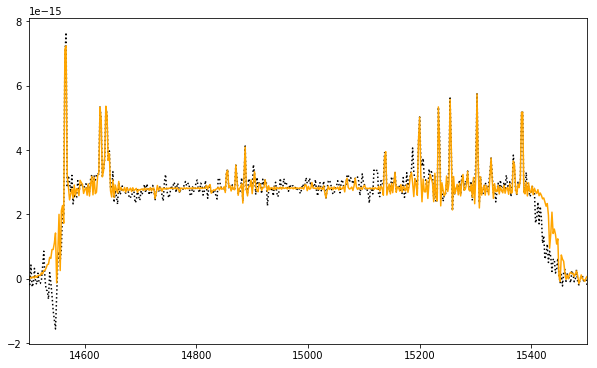

In [5]:
sky_lines_cm1 = cube.get_sky_lines()
axis, spectrum, fit_res = cube.fit_lines_in_spectrum(50, 50, 20, sky_lines_cm1,
                                                     fmodel='sinc',
                                                     pos_def='1',
                                                     fwhm_def='fixed',
                                                     nofilter=False,
                                                     pos_cov=80)
print '\n===== Results ======'
print 'Velocity: ', fit_res['velocity_gvar']
pl.figure(figsize=(10,6))
pl.plot(axis, spectrum, ls=':', c='black')
pl.plot(axis, fit_res['fitted_vector'], ls='-', c='orange')
pl.xlim(14500, 15500)

## Second step: Mapping the sky velocity

Warning: this process can take a long time because a spectrum is extracted and fitted for each point of a 40x40 grid by default. For a basic example it is recommended to limit the number of grid division to 10x10.

INFO| fitting process already done. Do you really want to redo it again ?


type [yes]: yes


INFO| X range: 0 2048, Y range: 0 2064
INFO| Radius: 85.3333333333
INFO| 100 regions to fit


 loading region: Shape : circle ( Number(1861.81818),Number(1876.36364),Number(85.33333) )

INFO| Fitting region 0/100


INFO| Velocity of the first line (km/s): 75.5(1.2)
INFO| Fitting region 1/100
INFO| Velocity of the first line (km/s): 75.8(1.2)
INFO| Fitting region 2/100
INFO| Velocity of the first line (km/s): 73.8(1.5)
INFO| Fitting region 3/100
INFO| Velocity of the first line (km/s): 71.6(1.4)
INFO| Fitting region 4/100
INFO| Velocity of the first line (km/s): 72.5(1.7)
INFO| Fitting region 5/100
INFO| Velocity of the first line (km/s): 69.9(1.6)
INFO| Fitting region 6/100
INFO| Velocity of the first line (km/s): 67.5(1.6)
INFO| Fitting region 7/100
INFO| Velocity of the first line (km/s): 66.6(1.5)
INFO| Fitting region 8/100
INFO| Velocity of the first line (km/s): 72.7(1.5)
INFO| Fitting region 9/100
INFO| Velocity of the first line (km/s): 70.7(2.0)
INFO| Fitting region 10/100
INFO| Velocity of the first line (km/s): 77.0(1.3)
INFO| Fitting region 11/100
INFO| Velocity of the first line (km/s): 76.6(1.3)
INFO| Fitting region 12/100
INFO| Velocity of the first line (km/s): 77.0(1.3)
INFO| Fitt

INFO| Fitting region 87/100
INFO| Velocity of the first line (km/s): 82.4(1.1)
INFO| Fitting region 88/100
INFO| Velocity of the first line (km/s): 80.33(93)
INFO| Fitting region 89/100
INFO| Velocity of the first line (km/s): 86.09(89)
INFO| Fitting region 90/100
INFO| Velocity of the first line (km/s): 84.4(1.7)
INFO| Fitting region 91/100
INFO| Velocity of the first line (km/s): 82.8(1.4)
INFO| Fitting region 92/100
INFO| Velocity of the first line (km/s): 82.3(1.6)
INFO| Fitting region 93/100
INFO| Velocity of the first line (km/s): 83.9(1.7)
INFO| Fitting region 94/100
INFO| Velocity of the first line (km/s): 83.9(1.5)
INFO| Fitting region 95/100
INFO| Velocity of the first line (km/s): 85.7(1.4)
INFO| Fitting region 96/100
INFO| Velocity of the first line (km/s): 83.8(1.1)
INFO| Fitting region 97/100
INFO| Velocity of the first line (km/s): 83.41(78)
INFO| Fitting region 98/100
INFO| Velocity of the first line (km/s): 83.27(81)
INFO| Fitting region 99/100
INFO| Velocity of the fi

First laser wavelentgh calibration estimation: 543.360354174 nm


INFO|     > Calibration laser map fit parameters:
    distance to mirror: 23.6769550191 cm 
    X angle from the optical axis to the center: -0.467348573066 degrees 
    Y angle from the optical axis to the center: 15.4964389183 degrees 
    Tip-tilt angle of the detector along X: 0.427738947088 degrees 
    Tip-tilt angle of the detector along Y: -1.22059704838 degrees 
    Rotation angle of the detector: 0.0 degrees (Fixed)
    Calibration laser wavelength: 543.360354174 nm (Fixed)
    Error on fit: mean -3.79483279357e-07, std 0.000789304258014 (in nm)
    Error on fit: mean -0.000209520225266, std 0.435790494439 (in km/s)
INFO|   > Third fit on a larger portion of the map (50.0% of the total size)
INFO|     > Calibration laser map fit parameters:
    distance to mirror: 23.7139686185 cm 
    X angle from the optical axis to the center: -0.46771103975 degrees 
    Y angle from the optical axis to the center: 15.496813076 degrees 
    Tip-tilt angle of the detector along X: 0.3011894

    > New calibration laser map fit parameters:
    distance to mirror: 23.6630434546 cm
    X angle from the optical axis to the center: -0.0972147989421 degrees
    Y angle from the optical axis to the center: 15.4797965758 degrees
    Tip-tilt angle of the detector along X: 4.69894825761 degrees
    Tip-tilt angle of the detector along Y: 0.336872109582 degrees
    Rotation angle of the detector: 1.38202531904 degrees
    Calibration laser wavelength: 543.42604743 nm

fit residual std (in km/s): 2.22847256858
median error on the data (in km/s) 1.44334722958


INFO| Data written as M31_SN3.1.0.ORCS/M31_SN3.1.0.calibration_laser_map.fits in 0.13 s 
INFO| Data written as M31_SN3.1.0.ORCS/M31_SN3.1.0.wavefront_map.fits in 0.23 s 
INFO| Data written as M31_SN3.1.0.ORCS/M31_SN3.1.0.skymap.fits in 0.16 s 


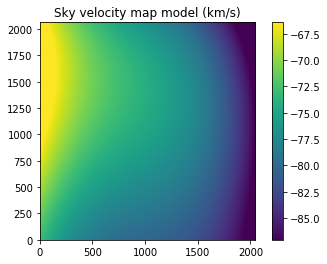

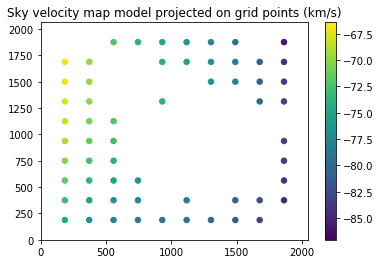

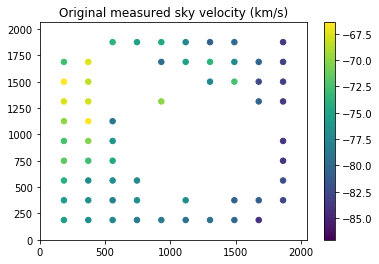

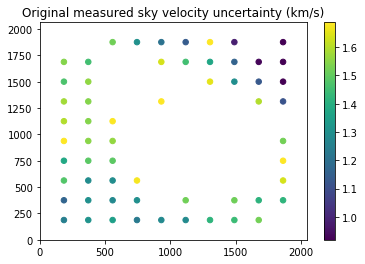

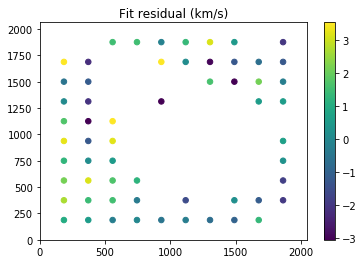

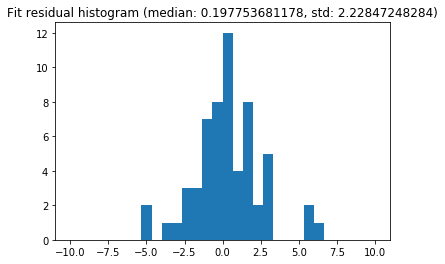

In [6]:
cube.map_sky_velocity(80, div_nb=10) # the mean velocity bias is set around 80 km/s

## Resulting data

The most important result is the skymap which gives the modelized velocity of the sky in the field of view and permit to correct the measured velocities in the cube.This map is named `*skymap.fits`. 

In this particular case this is `M31_SN3.1.0.ORCS/M31_SN3.1.0.skymap.fits`

The histogram displays the difference between the measured velocity and the fitted velocity at each valid data point.

You can see by looking at the other maps that in the cas of M31 there are some data points at the center of the field which could not give a valid velocity of the sky. This comes from the fact that M31 is very bright at the center and the sky lines are lost in the noise produced by the high continuum background. Modelling the interferometer makes possible to estimate the velocity of the lines at the center of the field where no real data has been obtained. And the result is stricking, it works particularly well even if the case of M31 ([Martin et al. 2017a](https://arxiv.org/abs/1707.01366))

## Calibrating your data with the sky velocity map

Once the velocity map is passed to the SpectralCube class, the class will internaly make the appropriate corrections so that the measured velocity of any spectrum will be corrected. But it will also correct the spectral misalignment of the spectra before extracting the data which should have an effect on the broadening of the lines when a spectrum is integrated over a large field of view with a non-negligible gradient on the velocity calibration.

In [7]:
# the computed sky velocity map is passed to cube
cube.correct_wavelength('M31_SN3.1.0.ORCS/M31_SN3.1.0.skymap.fits')

INFO| Number of integrated pixels: 1257


 [==========] [100%] [completed in 0.028 s]                                   


INFO| Init of the parallel processing server with 16 threads


 [==========] [100%] [completed in 0.701 s]                                   

===== Results ======
Velocity:  [-1.2(1.5) -1.2(1.5) -1.2(1.5) -1.2(1.5) -1.2(1.5) -1.2(1.5) -1.2(1.5)
 -1.2(1.5) -1.2(1.5) -1.2(1.5) -1.2(1.5) -1.2(1.5) -1.2(1.5) -1.2(1.5)
 -1.2(1.5) -1.2(1.5) -1.2(1.5) -1.2(1.5) -1.2(1.5) -1.2(1.5) -1.2(1.5)
 -1.2(1.5) -1.2(1.5) -1.2(1.5) -1.2(1.5) -1.2(1.5) -1.2(1.5) -1.2(1.5)
 -1.2(1.5) -1.2(1.5) -1.2(1.5) -1.2(1.5) -1.2(1.5) -1.2(1.5) -1.2(1.5)
 -1.2(1.5) -1.2(1.5) -1.2(1.5) -1.2(1.5) -1.2(1.5) -1.2(1.5) -1.2(1.5)
 -1.2(1.5) -1.2(1.5) -1.2(1.5) -1.2(1.5) -1.2(1.5) -1.2(1.5) -1.2(1.5)
 -1.2(1.5) -1.2(1.5) -1.2(1.5) -1.2(1.5) -1.2(1.5) -1.2(1.5) -1.2(1.5)
 -1.2(1.5) -1.2(1.5) -1.2(1.5) -1.2(1.5) -1.2(1.5) -1.2(1.5) -1.2(1.5)
 -1.2(1.5) -1.2(1.5) -1.2(1.5) -1.2(1.5) -1.2(1.5) -1.2(1.5) -1.2(1.5)
 -1.2(1.5) -1.2(1.5) -1.2(1.5) -1.2(1.5) -1.2(1.5) -1.2(1.5) -1.2(1.5)
 -1.2(1.5) -1.2(1.5) -1.2(1.5) -1.2(1.5) -1.2(1.5) -1.2(1.5) -1.2(1.5)
 -1.2(1.5) -1.2(1.5) -1.2(1.5) -1.2(

(14500, 15500)

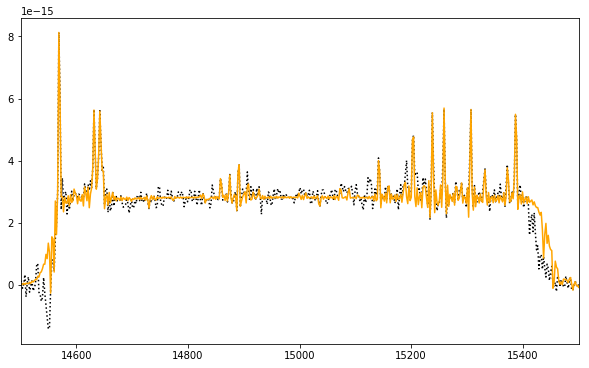

In [8]:
# The same sky spectrum is now extracted and fitted and the measured velocity is now similar to 0 km/s.
# Note that the calibration map used here has not been calculated with a 40x40 grid. The calibration 
# quality would have been better in this case.

sky_lines_cm1 = cube.get_sky_lines()
axis, spectrum, fit_res = cube.fit_lines_in_spectrum(50, 50, 20, sky_lines_cm1,
                                                     fmodel='sinc',
                                                     pos_def='1',
                                                     fwhm_def='fixed',
                                                     nofilter=False,
                                                     pos_cov=80)
print '\n===== Results ======'
print 'Velocity: ', fit_res['velocity_gvar']
pl.figure(figsize=(10,6))
pl.plot(axis, spectrum, ls=':', c='black')
pl.plot(axis, fit_res['fitted_vector'], ls='-', c='orange')
pl.xlim(14500, 15500)